# Competition

In [ ]:
Team 17- Contributers Vibha Krishna G, Agnas P Jimmy, Rohith V


In [ ]:
Topic-Finance and Insurance

In [ ]:
Dataset-TravelInsurancePrediction.csv 
Source-Kaggle

In [9]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [10]:
#loading dataset
df = pd.read_csv('TravelInsurancePrediction.csv')

In [11]:
df.head()

,Index,Age,Employment Type,Graduate Or Not,Agency Type,Annual Income,Family Members,Chronic Diseases,Frequent Flyer,Ever Travelled Abroad,Travel Insurance
0,0,31.0,Government Sector,Yes,Travel Agency,400000,6,1,No,No,0
1,1,31.0,Private Sector/Self Employed,Yes,Travel Agency,1250000,7,0,No,No,0
2,2,34.0,Private Sector/Self Employed,Yes,Travel Agency,500000,4,1,No,No,1
3,3,28.0,Private Sector/Self Employed,Yes,Travel Agency,700000,3,1,No,No,0
4,4,NaN,Private Sector/Self Employed,Yes,Airlines,700000,8,1,Yes,No,0


Content

Age- Age Of The Customer

Employment Type- The Sector In Which Customer Is Employed

GraduateOrNot- Whether The Customer Is College Graduate Or Not

AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]

FamilyMembers- Number Of Members In Customer's Family.

ChronicDisease- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.

FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].

EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]

TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Index                  2031 non-null   int64  
 1   Age                    1960 non-null   float64
 2   Employment Type        2031 non-null   object 
 3   Graduate  Or Not       2031 non-null   object 
 4   Agency Type            2031 non-null   object 
 5   Annual Income          2031 non-null   int64  
 6   Family Members         2031 non-null   int64  
 7   Chronic Diseases       2031 non-null   int64  
 8   Frequent Flyer         2031 non-null   object 
 9   Ever Travelled Abroad  2031 non-null   object 
 10  Travel Insurance       2031 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 174.7+ KB


# Missing Value handling

In [13]:
#checking for null values
df.isna().sum()

Index                     0
Age                      71
Employment Type           0
Graduate  Or Not          0
Agency Type               0
Annual Income             0
Family Members            0
Chronic Diseases          0
Frequent Flyer            0
Ever Travelled Abroad     0
Travel Insurance          0
dtype: int64

Only age has null values, which can be filled with mean values

In [14]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [15]:
df.isna().sum()

Index                    0
Age                      0
Employment Type          0
Graduate  Or Not         0
Agency Type              0
Annual Income            0
Family Members           0
Chronic Diseases         0
Frequent Flyer           0
Ever Travelled Abroad    0
Travel Insurance         0
dtype: int64

All null values have been handled

In [16]:
df_numerical=df._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             2031 non-null   int64  
 1   Age               2031 non-null   float64
 2   Annual Income     2031 non-null   int64  
 3   Family Members    2031 non-null   int64  
 4   Chronic Diseases  2031 non-null   int64  
 5   Travel Insurance  2031 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 95.3 KB


In [17]:
#we can drop index column here.
df.drop(columns=["Index"], inplace=True)

In [18]:
df_numerical=df._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2031 non-null   float64
 1   Annual Income     2031 non-null   int64  
 2   Family Members    2031 non-null   int64  
 3   Chronic Diseases  2031 non-null   int64  
 4   Travel Insurance  2031 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 79.5 KB


# Outlier Detection and Handling

In [19]:
#describing the data
df.describe()

,Age,Annual Income,Family Members,Chronic Diseases,Travel Insurance
count,2031.000000,2.031000e+03,2031.000000,2031.000000,2031.000000
mean,29.760204,9.577091e+05,4.747907,0.283604,0.360906
std,3.057841,5.535704e+05,1.615950,0.450858,0.480382
min,23.000000,5.552000e+04,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,51.000000,8.880000e+06,10.000000,1.000000,1.000000


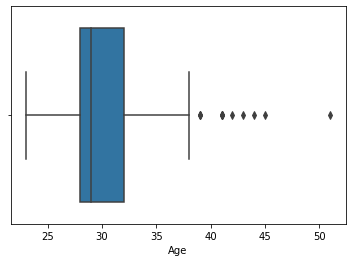

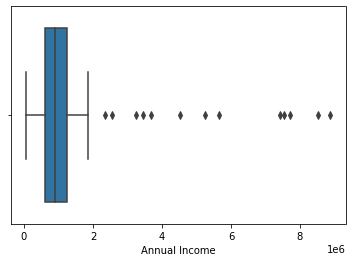

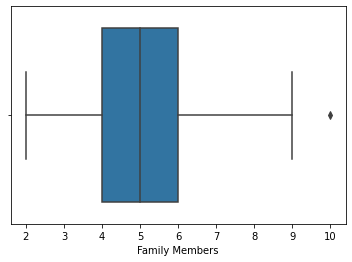

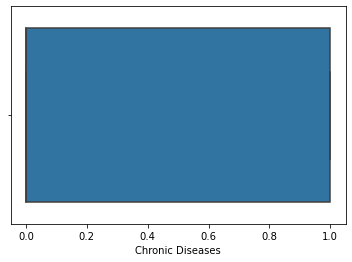

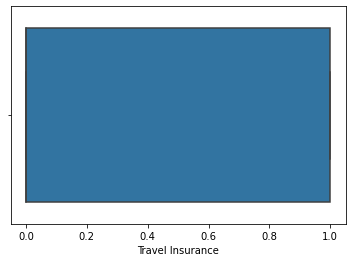

In [20]:
#Checking for outliers
for i, col in enumerate(df_numerical.columns):
    plt.figure(i)
    sns.boxplot(df_numerical[col])

In [21]:
Q1=np.percentile(df['Age'],25)
Q3=np.percentile(df['Age'],75)
print ('Q1 =',Q1,'Q3 =',Q3)
#calculating the inter quartile range
IQR=Q3-Q1
print('IQR =',IQR)
#calculating the upper and lower limits
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('lower limit =',low_lim,'upper limit =',upper_lim)

Q1 = 28.0 Q3 = 32.0
IQR = 4.0
lower limit = 22.0 upper limit = 38.0


<AxesSubplot:xlabel='Age'>

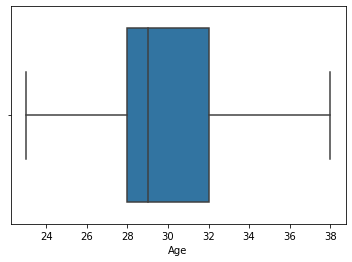

In [22]:
df['Age'] = np.where(df['Age']>upper_lim,upper_lim,
                    np.where(df['Age']<low_lim,low_lim,df['Age']))
sns.boxplot(df['Age'])

In [23]:
Q1=np.percentile(df['Annual Income'],25)
Q3=np.percentile(df['Annual Income'],75)
print ('Q1 =',Q1,'Q3 =',Q3)
#calculating the inter quartile range
IQR=Q3-Q1
print('IQR =',IQR)
#calculating the upper and lower limits
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('lower limit =',low_lim,'upper limit =',upper_lim)

Q1 = 600000.0 Q3 = 1250000.0
IQR = 650000.0
lower limit = -375000.0 upper limit = 2225000.0


<AxesSubplot:xlabel='Annual Income'>

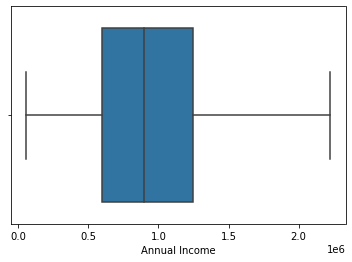

In [24]:
df['Annual Income'] = np.where(df['Annual Income']>upper_lim,upper_lim,
                    np.where(df['Annual Income']<low_lim,low_lim,df['Annual Income']))
sns.boxplot(df['Annual Income'])

In [25]:
Q1=np.percentile(df['Family Members'],25)
Q3=np.percentile(df['Family Members'],75)
print ('Q1 =',Q1,'Q3 =',Q3)
#calculating the inter quartile range
IQR=Q3-Q1
print('IQR =',IQR)
#calculating the upper and lower limits
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('lower limit =',low_lim,'upper limit =',upper_lim)

Q1 = 4.0 Q3 = 6.0
IQR = 2.0
lower limit = 1.0 upper limit = 9.0


<AxesSubplot:xlabel='Family Members'>

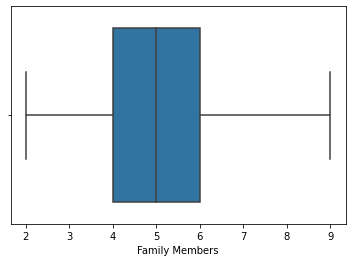

In [26]:
df['Family Members'] = np.where(df['Family Members']>upper_lim,upper_lim,
                    np.where(df['Family Members']<low_lim,low_lim,df['Family Members']))
sns.boxplot(df['Family Members'])

# Exploratory data analysis

UNIVARIATE ANALYSIS

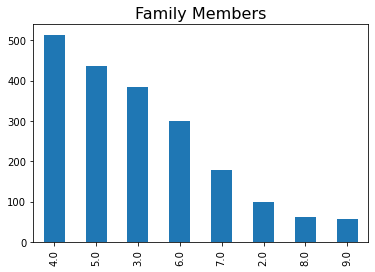

In [27]:
df['Family Members'].value_counts().plot(kind='bar')
plt.title("Family Members",fontsize=16)
plt.show()

#HERE WE CAN SEE THAT MOST PEOPLE HAD 4 FAMILY MEMBERS

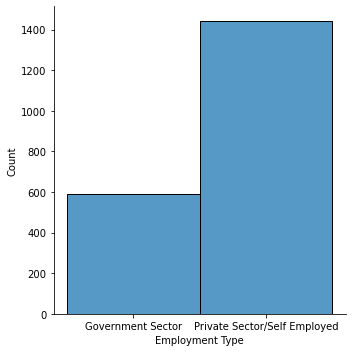

In [28]:
sns.displot(df['Employment Type'])
plt.show()
#here we can see that majority of people are in private sector

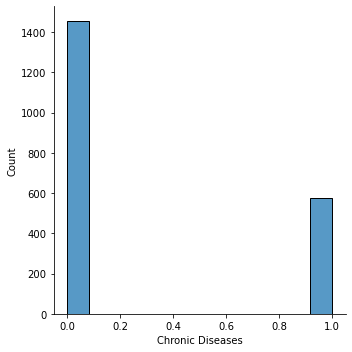

In [29]:
sns.displot(df['Chronic Diseases'])
plt.show()

#most people did not have any chronic illness.

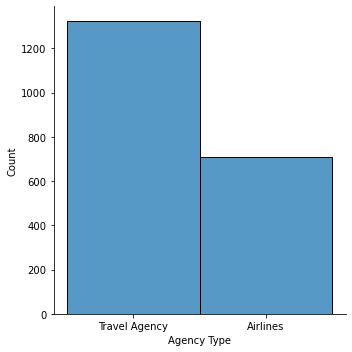

In [30]:
sns.displot(df['Agency Type'])
plt.show()

In [31]:
#Most people preferred travel agency.

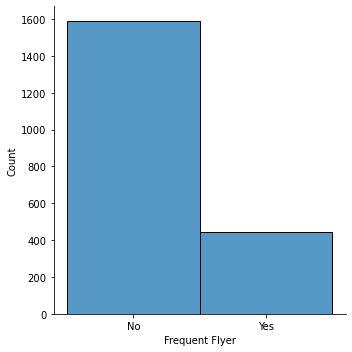

In [32]:
sns.displot(df['Frequent Flyer'])
plt.show()

#most are non frequent flyers.

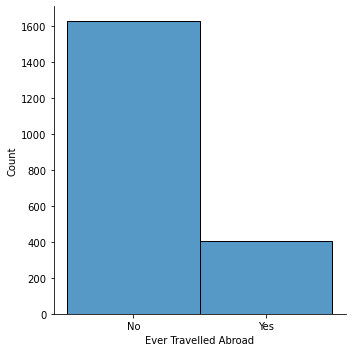

In [33]:
sns.displot(df['Ever Travelled Abroad'])
plt.show()

#most people never travelled abroad. 

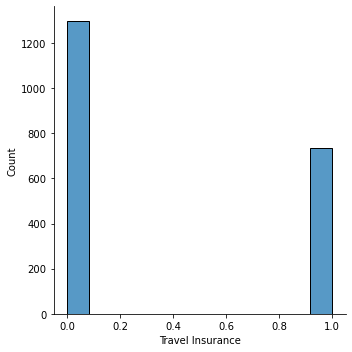

In [34]:
sns.displot(df['Travel Insurance'])
plt.show()

#most did not own a travel insurance

BIVARIATE

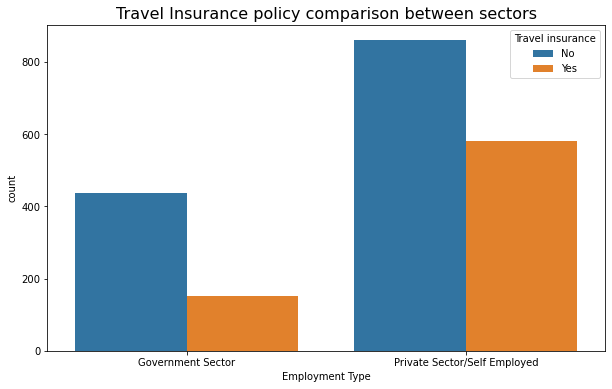

In [35]:
plt.figure(figsize=(10,6))
plot = sns.countplot(x='Employment Type',hue='Travel Insurance',data=df)
plt.title("Travel Insurance policy comparison between sectors",fontsize=16)
plt.legend(title='Travel insurance', loc='best', labels=['No', 'Yes'])
plt.show()

#Private sector employes had travel insurance than Govt employees.

<AxesSubplot:xlabel='Agency Type', ylabel='Annual Income'>

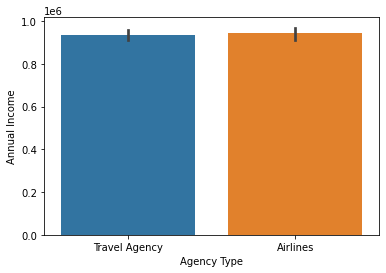

In [36]:
sns.barplot(x='Agency Type', y='Annual Income',data=df)

Both travel agency and airlines have same income despite the travel agency being preferred by more people which shows that
Airlines is costlier than travel agency

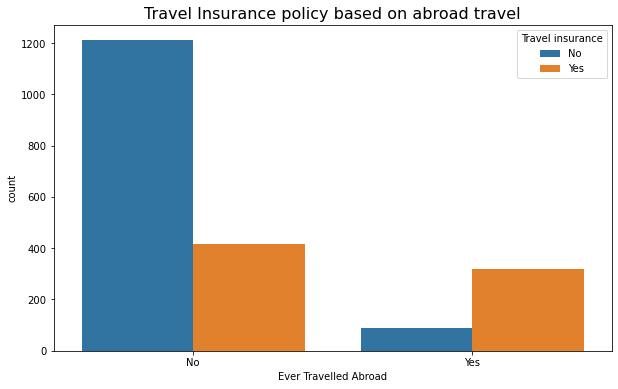

In [37]:
plt.figure(figsize=(10,6))
plot = sns.countplot(x='Ever Travelled Abroad',hue='Travel Insurance',data=df)
plt.title("Travel Insurance policy based on abroad travel",fontsize=16)
plt.legend(title='Travel insurance', loc='best', labels=['No', 'Yes'])
plt.show()

#People who travelled had travel insurance than others.

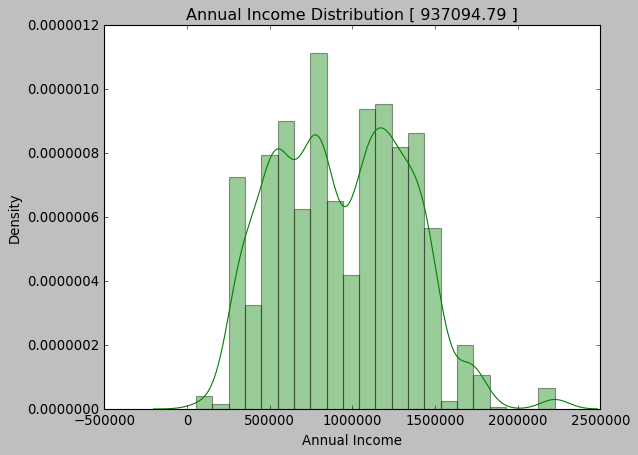

In [38]:
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["Annual Income"], color="g")
plt.title(f"Annual Income Distribution [ {df['Annual Income'].mean():.2f} ]")
plt.show()

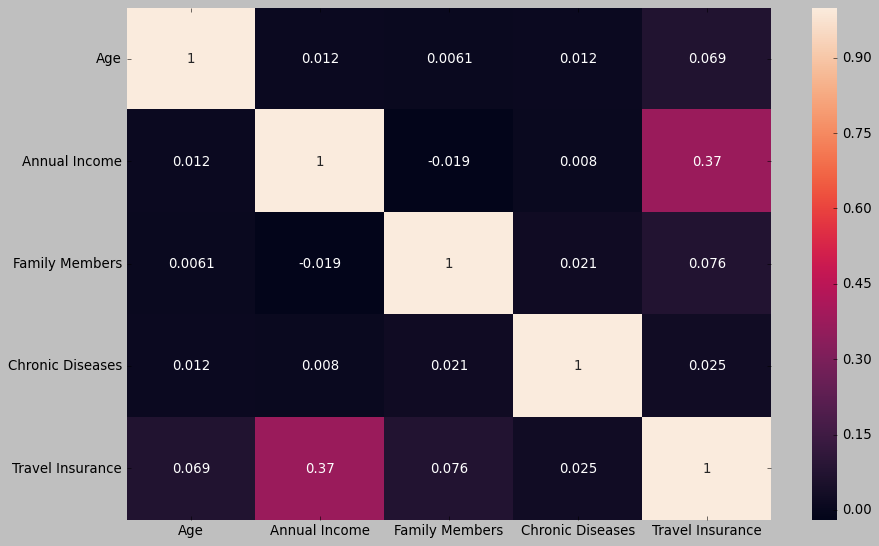

In [39]:
sns.set_palette(sns.color_palette("Set1", 8))
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Annual income and number of family members have negative correlation. Annual income and travel insurance have highest positive correlation.



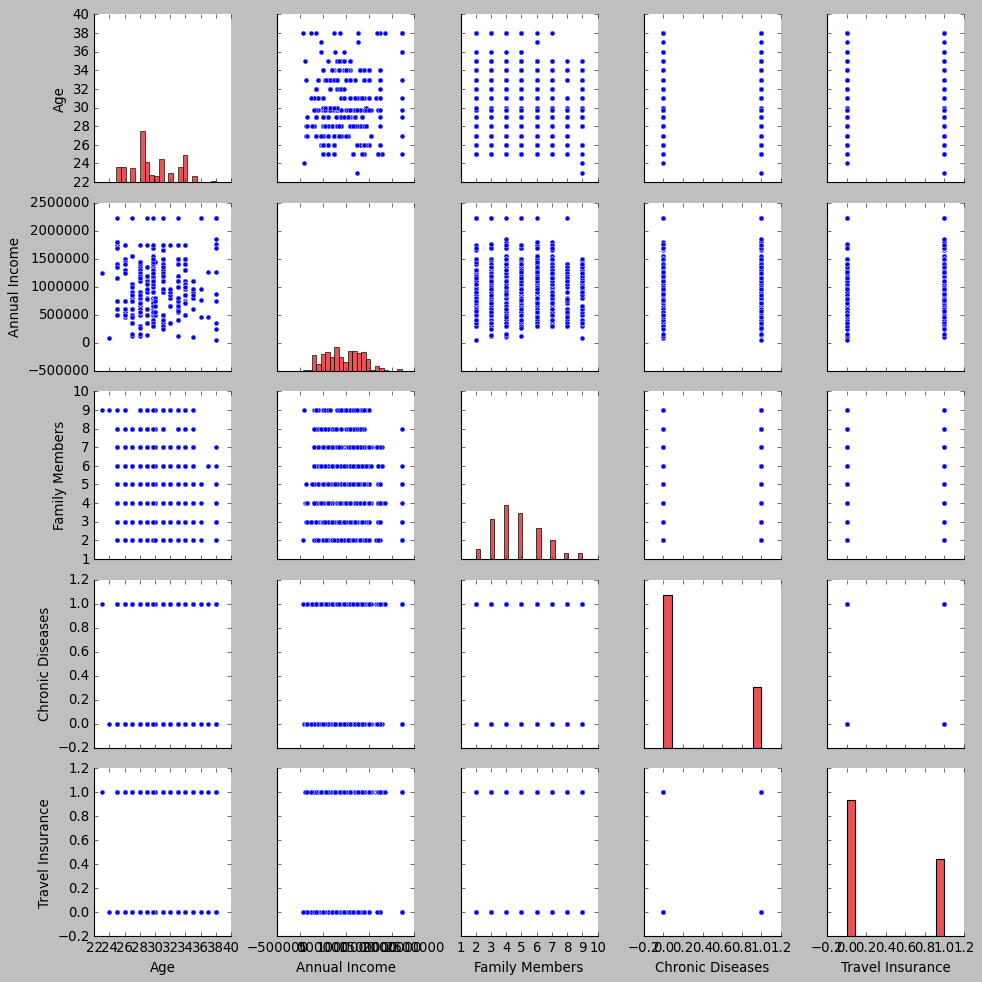

In [40]:
g = sns.pairplot(df)

# One Hot Encoding

In [41]:
df1 = pd.get_dummies(df)
df1.head()

,Age,Annual Income,Family Members,Chronic Diseases,Travel Insurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,Graduate Or Not_No,Graduate Or Not_Yes,Agency Type_Airlines,Agency Type_Travel Agency,Frequent Flyer_No,Frequent Flyer_Yes,Ever Travelled Abroad_No,Ever Travelled Abroad_Yes
0,31.000000,400000.0,6.0,1,0,1,0,0,1,0,1,1,0,1,0
1,31.000000,1250000.0,7.0,0,0,0,1,0,1,0,1,1,0,1,0
2,34.000000,500000.0,4.0,1,1,0,1,0,1,0,1,1,0,1,0
3,28.000000,700000.0,3.0,1,0,0,1,0,1,0,1,1,0,1,0
4,29.760204,700000.0,8.0,1,0,0,1,0,1,1,0,0,1,1,0


# Modelling

In [42]:
X = df1.drop(['Travel Insurance'], axis = 1)
y = df1['Travel Insurance']

In [43]:
X.describe()

,Age,Annual Income,Family Members,Chronic Diseases,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,Graduate Or Not_No,Graduate Or Not_Yes,Agency Type_Airlines,Agency Type_Travel Agency,Frequent Flyer_No,Frequent Flyer_Yes,Ever Travelled Abroad_No,Ever Travelled Abroad_Yes
count,2031.000000,2.031000e+03,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000
mean,29.735586,9.370948e+05,4.747415,0.283604,0.290005,0.709995,0.186115,0.813885,0.348597,0.651403,0.782373,0.217627,0.801083,0.198917
std,2.962997,3.938585e+05,1.614501,0.450858,0.453876,0.453876,0.389295,0.389295,0.476643,0.476643,0.412734,0.412734,0.399284,0.399284
min,23.000000,5.552000e+04,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,38.000000,2.225000e+06,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
#Standardising
col_names = X.columns

from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
X = standardisation.fit_transform(X)
X = pd.DataFrame(X,columns = col_names)
np.round(X.describe(),5)

,Age,Annual Income,Family Members,Chronic Diseases,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,Graduate Or Not_No,Graduate Or Not_Yes,Agency Type_Airlines,Agency Type_Travel Agency,Frequent Flyer_No,Frequent Flyer_Yes,Ever Travelled Abroad_No,Ever Travelled Abroad_Yes
count,2031.00000,2031.00000,2031.00000,2031.00000,2031.00000,2031.00000,2031.00000,2031.00000,2031.00000,2031.00000,2031.00000,2031.00000,2031.00000,2031.00000
mean,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000
std,1.00025,1.00025,1.00025,1.00025,1.00025,1.00025,1.00025,1.00025,1.00025,1.00025,1.00025,1.00025,1.00025,1.00025
min,-2.27379,-2.23885,-1.70213,-0.62919,-0.63911,-1.56468,-0.47820,-2.09118,-0.73154,-1.36698,-1.89605,-0.52741,-2.00680,-0.49831
25%,-0.58590,-0.85609,-0.46305,-0.62919,-0.63911,-1.56468,-0.47820,0.47820,-0.73154,-1.36698,0.52741,-0.52741,0.49831,-0.49831
50%,-0.24832,-0.09421,0.15649,-0.62919,-0.63911,0.63911,-0.47820,0.47820,-0.73154,0.73154,0.52741,-0.52741,0.49831,-0.49831
75%,0.76442,0.79466,0.77603,1.58935,1.56468,0.63911,-0.47820,0.47820,1.36698,0.73154,0.52741,-0.52741,0.49831,-0.49831
max,2.78989,3.27077,2.63464,1.58935,1.56468,0.63911,2.09118,0.47820,1.36698,0.73154,0.52741,1.89605,0.49831,2.00680


In [45]:
# importing alll the necessary libraries to use in various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K Nearest Neighbours
from sklearn.svm import SVC # for Support Vector Machine (SVM) Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier #for using Random Forest Algoithm


In [46]:
# importing necessary libraries for checking the model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)


# 1. Logistic Regression


In [47]:
logitreg = LogisticRegression(max_iter = 700)
logitreg.fit(X_train,y_train) 
y_predict = logitreg.predict(X_test)

In [48]:
print(accuracy_score(y_test,y_predict))
confusion_matrix(y_test,y_predict)

0.7311475409836066


array([[332,  36],
       [128, 114]], dtype=int64)

In [49]:
logitreg_as = accuracy_score(y_test,y_predict)
logitreg_as

0.7311475409836066

In [50]:
logit_model_f1 = f1_score(y_test,y_predict)
logit_model_f1

0.5816326530612245

# K-Nearest Neighbours(KNN)

In [51]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
y_predict1=knnmodel.predict(X_test)
print(accuracy_score(y_test,y_predict1))
confusion_matrix(y_test,y_predict1)

0.7180327868852459


array([[314,  54],
       [118, 124]], dtype=int64)

In [52]:
logitreg_as1 = accuracy_score(y_test,y_predict1)
logitreg_as1

0.7180327868852459

In [53]:
logit_model_f1 = f1_score(y_test,y_predict1)
logit_model_f1

0.5904761904761905

# DecisionTree

In [54]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_predict2=dt.predict(X_test)
print(accuracy_score(y_test,y_predict2))
confusion_matrix(y_test,y_predict2)


0.7081967213114754


array([[292,  76],
       [102, 140]], dtype=int64)

In [55]:
logitreg_as2 = accuracy_score(y_test,y_predict2)
logitreg_as2


0.7081967213114754

In [56]:
logit_model_f1 = f1_score(y_test,y_predict2)
logit_model_f1

0.611353711790393

# Random Forest

In [57]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_predict3=rf.predict(X_test)
print(accuracy_score(y_test,y_predict3))
confusion_matrix(y_test,y_predict3)


0.739344262295082


array([[322,  46],
       [113, 129]], dtype=int64)

In [58]:
logitreg_as3 = accuracy_score(y_test,y_predict3)
logitreg_as3


0.739344262295082

In [59]:
logit_model_f1 = f1_score(y_test,y_predict3)
logit_model_f1

0.6187050359712231

# Support Vector Machine (SVM)

In [60]:
svm_model = SVC(kernel = 'rbf',C=30,gamma='auto') 
svm_model.fit(X_train,y_train) 
y_predict4 = svm_model.predict(X_test) 
print(accuracy_score(y_test,y_predict3))
confusion_matrix(y_test,y_predict4)


0.739344262295082


array([[340,  28],
       [118, 124]], dtype=int64)

In [61]:
logitreg_as4 = accuracy_score(y_test,y_predict4)
logitreg_as4


0.760655737704918

In [62]:
logit_model_f1 = f1_score(y_test,y_predict3)
logit_model_f1

0.6187050359712231

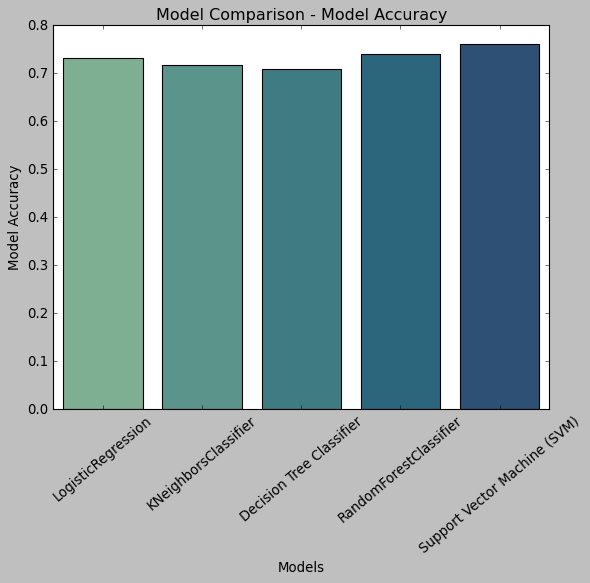

In [63]:
plt.style.use("classic")
x = ["LogisticRegression","KNeighborsClassifier","Decision Tree Classifier","RandomForestClassifier","Support Vector Machine (SVM)"]

y = [logitreg_as,logitreg_as1,logitreg_as2,logitreg_as3,logitreg_as4]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.xlabel("Models")
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy");


In [64]:
pd.DataFrame(rf.feature_importances_ , index = X.columns, columns = ['Feature Importance']).sort_values(by='Feature Importance',ascending=False)

,Feature Importance
Annual Income,0.357243
Family Members,0.187121
Age,0.182665
Ever Travelled Abroad_No,0.068902
Ever Travelled Abroad_Yes,0.054823
Chronic Diseases,0.033642
Frequent Flyer_Yes,0.020711
Frequent Flyer_No,0.020635
Agency Type_Airlines,0.013933
Agency Type_Travel Agency,0.013515


In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]


In [67]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score} 


In [68]:
rf = RandomForestClassifier()
grid = GridSearchCV(rf,param_grid)

In [69]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [70]:
predictions = grid.predict(X_test)

In [71]:
logitreg_as41 = accuracy_score(y_test,y_predict3)
logit_model_f11=f1_score(y_test,y_predict3)


In [72]:
randfor = pd.DataFrame({
                     'BeforeTuning':[logitreg_as4,logit_model_f1],
                    'AfterTuning':[logitreg_as41,logit_model_f11]
                    },index=['Accuracy','F1_Score'])
randfor.transpose()

,Accuracy,F1_Score
BeforeTuning,0.760656,0.618705
AfterTuning,0.739344,0.618705


thus the fine tuning didnt help improve the model

In [74]:
rf1=RandomForestClassifier(bootstrap=False,max_features= 4,n_estimators=100,oob_score= False)
rf1.fit(X_train,y_train)
pd.Series(rf1.feature_importances_, index=X.columns).sort_values(ascending=False)*100

Annual Income                                   38.134399
Family Members                                  19.520199
Age                                             17.264770
Ever Travelled Abroad_No                         5.918699
Ever Travelled Abroad_Yes                        5.422139
Chronic Diseases                                 2.990267
Frequent Flyer_Yes                               1.913582
Frequent Flyer_No                                1.743284
Agency Type_Airlines                             1.328984
Agency Type_Travel Agency                        1.321508
Graduate  Or Not_Yes                             1.151760
Graduate  Or Not_No                              1.121568
Employment Type_Private Sector/Self Employed     1.116388
Employment Type_Government Sector                1.052455
dtype: float64

The best parameters to find the travel insurance behaviour are-Annual Income,Family Members and Age